## Consigna ejercicio final

1. Analiza la estructura de la red neuronal correcta y observa la función de cada capa.
2. Reordena las capas del modelo para que coincidan con el modelo correcto.
3. Una pista: empieza con Flatten y termina con la capa de 10 neuronas con softmax.
4. Luego de corregir el modelo, compílalo y entrénalo para verificar su accuracy.
5. Calcula el accuracy del modelo corregido.

PS1: Para la compilación: optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

PS2: Para el entrenamiento no más de 5 épocas y validarlo.

## Consejos

- Explicación para los alumnos:
- Esta red neuronal recibe imágenes de 28x28 píxeles en escala de grises y las clasifica en 10 categorías de ropa.
- Utiliza capas densas (fully connected) con activación ReLU y una capa final con activación softmax para la clasificación.
- Además, emplea Dropout para reducir el sobreajuste.

## Importación de librerías

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

## Carga del dataset

4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


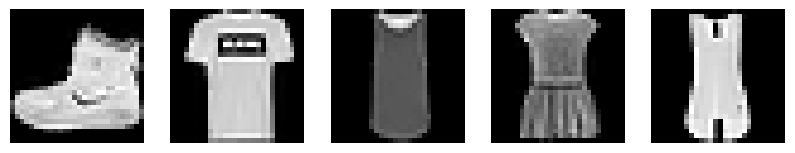

In [3]:
# Cargar el dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar las imágenes
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizar los datos

# Mostrar algunas imágenes del dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()


## Crear el modelo

In [ ]:
# Modelo sequencial
model = Sequential()

# Añadir capas al modelo
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Resumen del modelo
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

## Compila y entrena el modelo

In [22]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo usando 5 epochs
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7621 - loss: 0.6633
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8510 - loss: 0.4087
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8611 - loss: 0.3785
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8710 - loss: 0.3489
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8779 - loss: 0.3279


## Evalua "accuracy" y "loss" del modelo

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8700 - loss: 0.3545
Test accuracy: 0.8686000108718872
Test loss: 0.35874634981155396


## Visualiza las predicciones

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


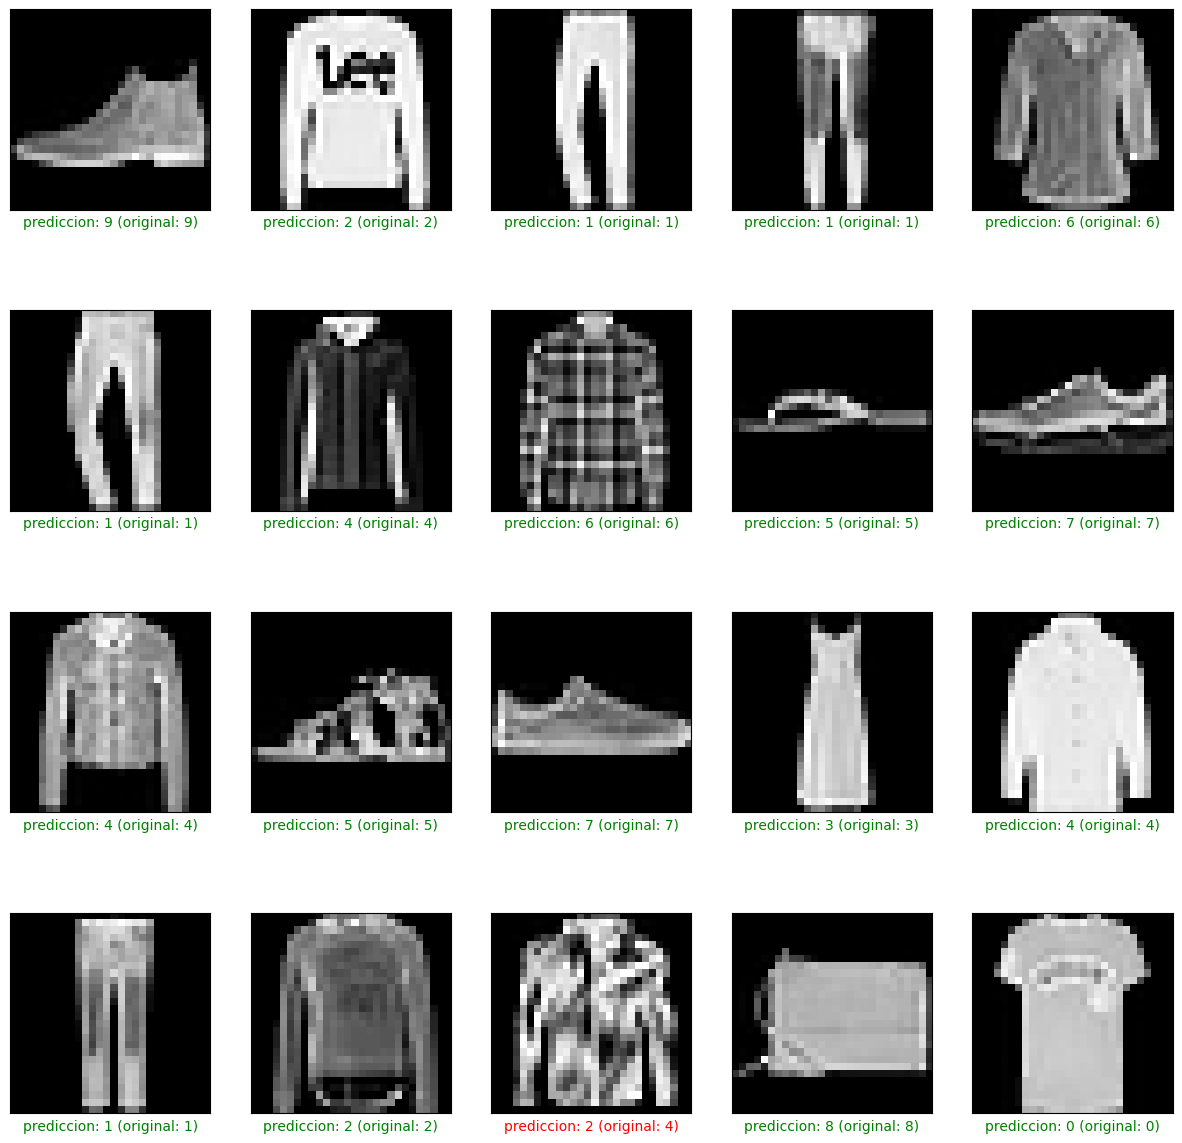

In [48]:
muestra = model.predict(x_test)

plt.figure(figsize=(15, 15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap='gray')
    prediccion = muestra[i].argmax()
    original = y_test[i]
    if prediccion == original:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'prediccion: {prediccion} (original: {original})', color=color)
plt.show()